In [2]:
!git clone https://github.com/Ashutosh-Vermaa/SilhouetteClustering.git

Cloning into 'SilhouetteClustering'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data= pd.read_csv("/content/SilhouetteClustering/Customers.csv")

In [5]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#to be able to visualize the plot, we use 2D data
df= data.iloc[:, 3:5]

In [7]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
#use elbow method to find optimum number of clusters for k-means
from sklearn.cluster import KMeans
wcss= [] #within cluster sum of squares

for i in range(1, 20):
  kmeans= KMeans(n_clusters= i, init= "k-means++") #k-means++ makes sure that on the onset the centroids are initialized far from each other to avoid wrong grouping 
  kmeans.fit(df)
  wcss.append(kmeans.inertia_) #.inertia_ contains the within cluster sum of squared distance

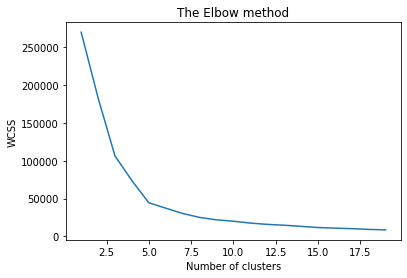

In [9]:
plt.plot(range(1, 20), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
#we take k=5 as after that, wcss is almost constant
kmeans= KMeans(n_clusters=5)
kmeans.fit(df)
cls= kmeans.fit_predict(df) #this will give the labels assigned to each datapoint

In [11]:
cls

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 1, 4, 0, 4, 0, 4,
       1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4], dtype=int32)

In [12]:
df[cls==0] #this gives the records that are assigned cluster 0

,Annual Income (k$),Spending Score (1-100)
124,70,29
128,71,11
130,71,9
134,73,5
136,73,7
138,74,10
140,75,5
144,77,12
146,77,36
148,78,22


In [13]:
df['cls']=cls

In [14]:
df

,Annual Income (k$),Spending Score (1-100),cls
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,0
197,126,74,4
198,137,18,0


In [15]:
kmeans.cluster_centers_ #this gives the centroids of the clusters

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

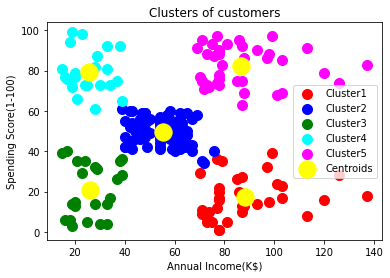

In [16]:
plt.scatter(df[df.cls==0].iloc[:,0],df[df.cls==0].iloc[:,1],s=100,c='red',label='Cluster1') #taking annual income as x and spending as y 
plt.scatter(df[df.cls==1].iloc[:,0],df[df.cls==1].iloc[:,1],s=100,c='blue',label='Cluster2')
plt.scatter(df[df.cls==2].iloc[:,0],df[df.cls==2].iloc[:,1],s=100,c='green',label='Cluster3')
plt.scatter(df[df.cls==3].iloc[:,0],df[df.cls==3].iloc[:,1],s=100,c='cyan',label='Cluster4')
plt.scatter(df[df.cls==4].iloc[:,0],df[df.cls==4].iloc[:,1],s=100,c='magenta',label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [23]:
#validating the number of clusters with Silhouette score
from sklearn.metrics import silhouette_samples,silhouette_score
lst_sl_avg=[]
for i in range(2,15):
    cluster_model=KMeans(n_clusters=i,init='k-means++')
    cluster_labels=cluster_model.fit_predict(df.iloc[:, :-1])
    sil_avg=silhouette_score(df.iloc[:, :-1],cluster_labels)
    lst_sl_avg.append(sil_avg)

In [24]:
lst_sl_avg #we can see that the optimum number of cluster is 5 which is obtained using elbow method

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5379675585622219,
 0.5321706886465517,
 0.45492755850983463,
 0.4595491760122954,
 0.4509237544334418,
 0.43560008750473395,
 0.42527464562585193,
 0.4351768885549498,
 0.4239283876511737]